<div align='center' style='font-family:"B Nazanin"'>
<h1> تکلیف سری چهارم درس یادگیری ماشین </h1>
<h2> سارا برادران - شماره دانشجویی : 9624193 </h2>
</div>

In [1]:
import pandas
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
مجموعه داده های آموزشی که در فایل Q1.csv قرار دارد شامل نمرات دانشجویان یک کلاس می باشد. ستون اول نمرات شفاهی و ستون دوم نمرات امتحان کتبی درس از 100 نمره می باشد. ستون سوم نیز نشان دهنده قبولی یا عدم قبولی شخص در آن درس است. هدف از این سوال طراحی یک طبقه بند رگرسیون لاجستیک به منظور پیش بینی احتمال قبولی بر اساس نمرات امتحان هر شخص است.
</span>
</h4> 
<h4>
<span style='font-family:"B Nazanin"'>    
الف) ابتدا 70 درصد داده ها را به منظور آموزش طبقه بند و 30 درصد باقی مانده را برای تست به صورت تصادفی تقسیم کرده و داده های آموزشی را توسط دو رنگ متفاوت نمایش دهید.
</span>
</h4>
    
</div>

In [2]:
Q1_Df = pandas.read_csv('Q1.csv', header=None, names=['Oral','Written', 'Pass_Status'])

In [3]:
Q1_Df.head()

,Oral,Written,Pass_Status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
y = Q1_Df[['Pass_Status']]
x = Q1_Df[['Oral','Written']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)

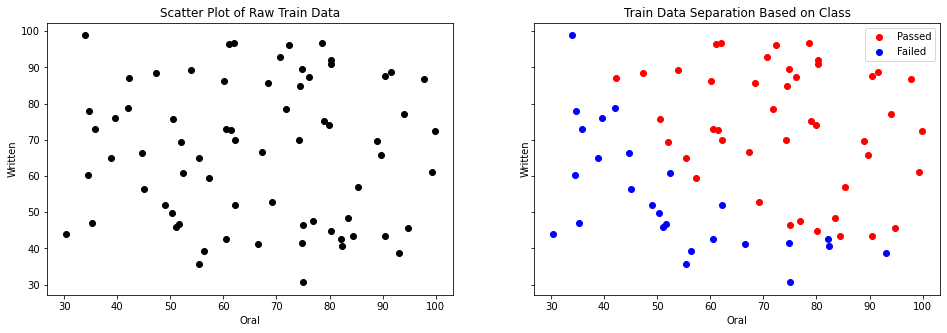

In [5]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16, 5))
ax[0].scatter(x_train['Oral'], x_train['Written'], c='black')
ax[0].set_xlabel("Oral")
ax[0].set_ylabel("Written")
ax[0].set_title("Scatter Plot of Raw Train Data")

ax[1].scatter(x_train[y_train['Pass_Status'] == 1]['Oral'], x_train[y_train['Pass_Status'] == 1]['Written'], 
              c='r', label="Passed")
ax[1].scatter(x_train[y_train['Pass_Status'] == 0]['Oral'], x_train[y_train['Pass_Status'] == 0]['Written'], 
              c='b', label="Failed")
ax[1].set_xlabel("Oral")
ax[1].set_ylabel("Written")
ax[1].set_title("Train Data Separation Based on Class")
ax[1].legend()

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
ب) یک طبقه بند رگرسیون لاجستیک را بر روی داده های آموزشی آموزش داده و سپس دقت آن را هم بر روی داده های آموزشی و هم بر روی داده های تست به دست آورید.
</span>
</h4> 
    
</div>

In [6]:
model = LogisticRegression()
model.fit(x_train, y_train.values.ravel())

LogisticRegression()

In [7]:
y_predict = model.predict(x_train)
print("Accuracy on Train Data =", accuracy_score(y_train,y_predict))

Accuracy on Train Data = 0.9


In [8]:
y_predict = model.predict(x_test)
y_predict = pandas.DataFrame(y_predict, columns=['Pass_Status'], index=y_test.index)
print("Accuracy on Test Data =", accuracy_score(y_test,y_predict))

Accuracy on Test Data = 0.9333333333333333


<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
ج) مرز تصمیم این طبقه بند و داده های تست را رسم کنید.
</span>
</h4> 
    
</div>

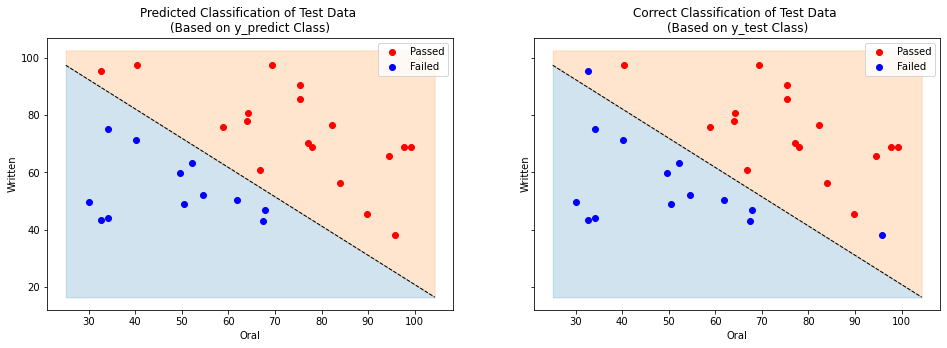

In [9]:
# Retrieve the model parameters.
b = model.intercept_[0]
w1, w2 = model.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16, 5))

# Plot the data and the classification with the decision boundary.
x_min, x_max = x_test['Oral'].min() - 5, x_test['Oral'].max() + 5
y_min, y_max = x_test['Written'].min() - 22, x_test['Written'].max() + 5
xd = np.array([x_min, x_max])
yd = m*xd + c

ax[0].plot(xd, yd, 'k', lw=1, ls='--')
ax[0].fill_between(xd, yd, y_min, color='tab:blue', alpha=0.2)
ax[0].fill_between(xd, yd, y_max, color='tab:orange', alpha=0.2)

ax[0].scatter(x_test[y_predict['Pass_Status'] == 1]['Oral'], x_test[y_predict['Pass_Status'] == 1]['Written'], 
              c='r', label="Passed")
ax[0].scatter(x_test[y_predict['Pass_Status'] == 0]['Oral'], x_test[y_predict['Pass_Status'] == 0]['Written'], 
              c='b', label="Failed")
ax[0].set_xlabel("Oral")
ax[0].set_ylabel("Written")
ax[0].set_title("Predicted Classification of Test Data \n(Based on y_predict Class)")
ax[0].legend()

ax[1].plot(xd, yd, 'k', lw=1, ls='--')
ax[1].fill_between(xd, yd, y_min, color='tab:blue', alpha=0.2)
ax[1].fill_between(xd, yd, y_max, color='tab:orange', alpha=0.2)

ax[1].scatter(x_test[y_test['Pass_Status'] == 1]['Oral'], x_test[y_test['Pass_Status'] == 1]['Written'], 
              c='r', label="Passed")
ax[1].scatter(x_test[y_test['Pass_Status'] == 0]['Oral'], x_test[y_test['Pass_Status'] == 0]['Written'], 
              c='b', label="Failed")
ax[1].set_xlabel("Oral")
ax[1].set_ylabel("Written")
ax[1].set_title("Correct Classification of Test Data \n(Based on y_test Class)")
ax[1].legend()

plt.show()

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
واضح است که در طبقه بندی فوق توسط مدل رگرسیون لاجستیک تنها کلاس مربوط به دو مورد از داده های تست توسط مدل اشتباه پیش بینی شده است.
</span>
</h4> 
    
</div>

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
مجموعه داده های آموزشی که در فایل Q2.csv قرار دارد نتایج دو آزمون بر روی میکروچیپ های تولیدی یک شرکت است. ستون سوم نشان دهنده پذیرش و یا رد شدن هر چیپ می باشد. در این سوال یک طبقه بند رگرسیون لاجستیک منتظم برای طبقه بندی این نتایج آزمون ها طراحی خواهد شد.
</span>
</h4> 
<h4>
<span style='font-family:"B Nazanin"'>    
الف) ابتدا 70 درصد داده ها را به منظور آموزش طبقه بند و 30 درصد باقی مانده را برای تست به صورت تصادفی تقسیم کرده و داده های آموزشی را توسط دو رنگ متفاوت نمایش دهید.
</span>
</h4>
    
</div>

In [10]:
Q2_Df = pandas.read_csv('Q2.csv', header=None, names=['Test1','Test2', 'Acceptance'])

In [11]:
Q2_Df.head()

,Test1,Test2,Acceptance
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [12]:
y = Q2_Df[['Acceptance']]
x = Q2_Df[['Test1','Test2']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)

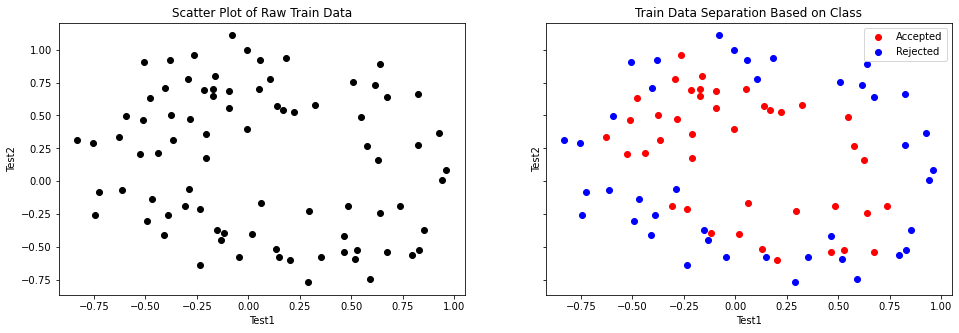

In [13]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16, 5))
ax[0].scatter(x_train['Test1'], x_train['Test2'], c='black')
ax[0].set_xlabel("Test1")
ax[0].set_ylabel("Test2")
ax[0].set_title("Scatter Plot of Raw Train Data")

ax[1].scatter(x_train[y_train['Acceptance'] == 1]['Test1'], x_train[y_train['Acceptance'] == 1]['Test2'], 
              c='r', label="Accepted")
ax[1].scatter(x_train[y_train['Acceptance'] == 0]['Test1'], x_train[y_train['Acceptance'] == 0]['Test2'], 
              c='b', label="Rejected")
ax[1].set_xlabel("Test1")
ax[1].set_ylabel("Test2")
ax[1].set_title("Train Data Separation Based on Class")
ax[1].legend()


<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
    ب) در این سوال با توجه به عدم امکان تفکیک خطی ، نیاز است که داده های ورودی به یک فضای ویژگی پیچیده تر تصویر شده و سپس آموزش طبقه بند صورت گیرد. با بردن داده ها به یک فضای ویژگی پیچیده تر شامل تمام چند جمله ای های تا مرتبه ۴ ، طبقه بند را آموزش دهید.
</span>
</h4> 
</div>
    

In [14]:
x_train = PolynomialFeatures(degree = 4).fit_transform(x_train)
x_test  = PolynomialFeatures(degree = 4).fit_transform(x_test)

In [15]:
model = LogisticRegression(solver='saga', penalty='none', max_iter=5000)
model.fit(x_train, y_train.values.ravel())

LogisticRegression(max_iter=5000, penalty='none', solver='saga')

In [16]:
y_predict = model.predict(x_train)
print("Accuracy on Train Data =", accuracy_score(y_train,y_predict))

Accuracy on Train Data = 0.8780487804878049


In [17]:
y_predict = model.predict(x_test)
print("Accuracy on Test Data =", accuracy_score(y_test,y_predict))

Accuracy on Test Data = 0.75


<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
ج) برای جلوگیری از بیش برازش بر روی داده های آموزشی از پارامتر منتظم سازی استفاده می شود.
با تغییر دادن این پارامتر و آموزش مجدد دقت را هم بر روی داده های آموزشی و داده های تست با هم مقابسه کنید

</span>
</h4> 
    
</div>

In [18]:
model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, max_iter=5000)
model.fit(x_train, y_train.values.ravel())

LogisticRegression(l1_ratio=0.5, max_iter=5000, penalty='elasticnet',
                   solver='saga')

In [19]:
y_predict = model.predict(x_train)
print("Accuracy on Train Data =", accuracy_score(y_train,y_predict))

Accuracy on Train Data = 0.8170731707317073


In [20]:
y_predict = model.predict(x_test)
print("Accuracy on Test Data =", accuracy_score(y_test,y_predict))

Accuracy on Test Data = 0.7777777777777778


<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
در مثال فوق واضح است که در حالت اول که بدون استفاده از ضریب منظم سازی مدل آموزش داده شد دقت بر روی داده های تست حدود 75 درصد و دقت بر روی داده های آموزش حدود 87 درصد براورد شد این درحالی است که ضمن استفاده از ضریب منظم سازی دقت مدل بر روی داده های تست 77 درصد و بر روی داده های اموزش 81 درصد شد به عبارت دیگر واریانس کاهش و بایاس افزایش یافت.
</span>
</h4> 

    
</div>

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
در این سوال با استفاده از ماشین بردار پشتیبان یک طبقه بند برای دسته بندی دو کلاس طراحی خواهید کرد.
</span>
</h4> 
<h4>
<span style='font-family:"B Nazanin"'>    
الف) با استفاده از داده های آموزشی موجود در فایل Q3_1.csv یک طبقه بند ماشین بردار پشتیبان آموزش دهید همچنین داده ها و مرز تصمیم را ترسیم کنید. با تغییر دادن پارامتر c در این طبقه بند تغییرات در مرز تصمیم را ترسیم و علت را توضیح دهید.
</span>
</h4>
    
</div>

In [21]:
Q3_1_Df = pandas.read_csv('Q3_1.csv', header=None, names=['F1','F2', 'Class'])

In [22]:
Q3_1_Df.head()

,F1,F2,Class
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [23]:
y_train = Q3_1_Df[['Class']]
x_train = Q3_1_Df[['F1', 'F2']]
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train.values.ravel())

SVC(kernel='linear')

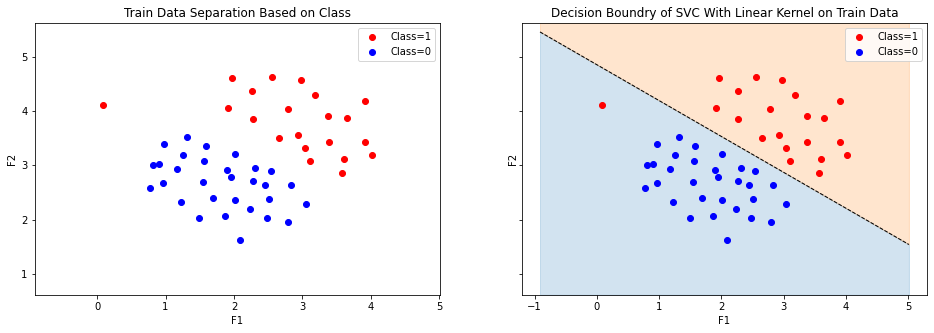

In [24]:
# Retrieve the model parameters.
b = model.intercept_[0]
w1, w2 = model.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16, 5))

# Plot the data and the classification with the decision boundary.
x_min, x_max = x_train['F1'].min() - 1, x_train['F1'].max() + 1
y_min, y_max = x_train['F2'].min() - 1, x_train['F2'].max() + 1
xd = np.array([x_min, x_max])
yd = m*xd + c


ax[0].scatter(x_train[y_train['Class'] == 1]['F1'], x_train[y_train['Class'] == 1]['F2'], 
              c='r', label="Class=1")
ax[0].scatter(x_train[y_train['Class'] == 0]['F1'], x_train[y_train['Class'] == 0]['F2'], 
              c='b', label="Class=0")
ax[0].set_xlim((x_min, x_max))
ax[0].set_ylim((y_min, y_max))
ax[0].set_xlabel("F1")
ax[0].set_ylabel("F2")
ax[0].set_title("Train Data Separation Based on Class")
ax[0].legend()

ax[1].plot(xd, yd, 'k', lw=1, ls='--')
ax[1].fill_between(xd, yd, y_min, color='tab:blue', alpha=0.2)
ax[1].fill_between(xd, yd, y_max, color='tab:orange', alpha=0.2)

ax[1].scatter(x_train[y_train['Class'] == 1]['F1'], x_train[y_train['Class'] == 1]['F2'], 
              c='r', label="Class=1")
ax[1].scatter(x_train[y_train['Class'] == 0]['F1'], x_train[y_train['Class'] == 0]['F2'], 
              c='b', label="Class=0")
ax[1].set_xlabel("F1")
ax[1].set_ylabel("F2")
ax[1].set_title("Decision Boundry of SVC With Linear Kernel on Train Data")
ax[1].legend()

plt.show()

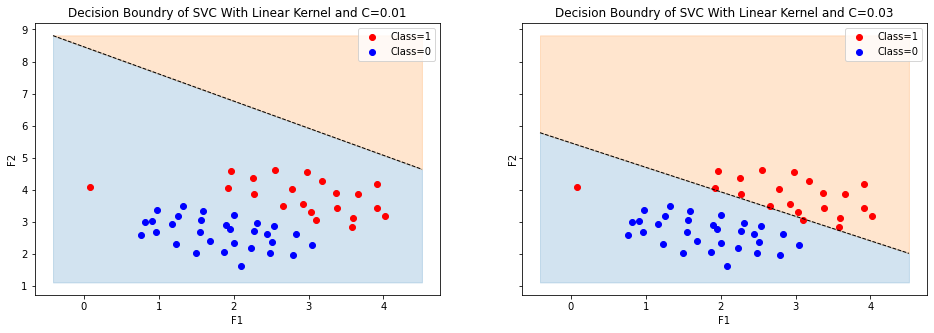

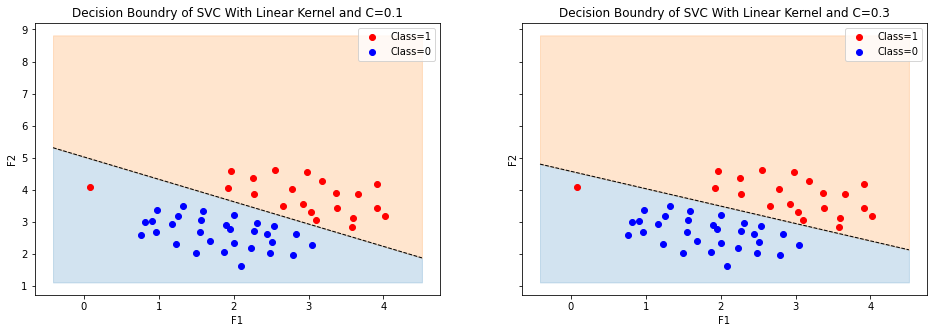

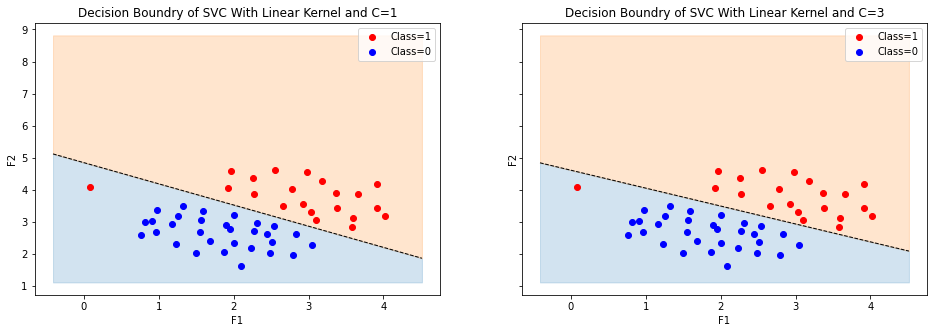

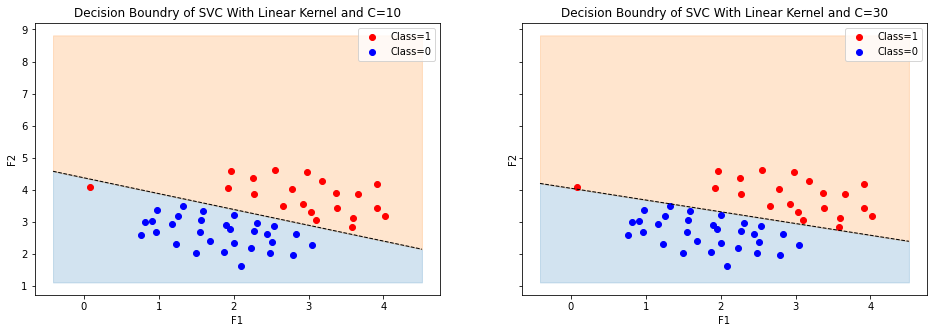

In [25]:
C_param = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]


for i in range(0, len(C_param), 2):
    
    fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16, 5))
        
    model = svm.SVC(kernel='linear', C=C_param[i])
    model.fit(x_train, y_train.values.ravel())

    # Retrieve the model parameters.
    b = model.intercept_[0]
    w1, w2 = model.coef_.T
    # Calculate the intercept and gradient of the decision boundary.
    c = -b/w2
    m = -w1/w2

    # Plot the data and the classification with the decision boundary.
    x_min, x_max = x_train['F1'].min() - 0.5, x_train['F1'].max() + 0.5
    y_min, y_max = x_train['F2'].min() - 0.5, x_train['F2'].max() + 4.2
    xd = np.array([x_min, x_max])
    yd = m*xd + c

    ax[i%2].plot(xd, yd, 'k', lw=1, ls='--')
    ax[i%2].fill_between(xd, yd, y_min, color='tab:blue', alpha=0.2)
    ax[i%2].fill_between(xd, yd, y_max, color='tab:orange', alpha=0.2)

    ax[i%2].scatter(x_train[y_train['Class'] == 1]['F1'], x_train[y_train['Class'] == 1]['F2'], 
                  c='r', label="Class=1")
    ax[i%2].scatter(x_train[y_train['Class'] == 0]['F1'], x_train[y_train['Class'] == 0]['F2'], 
                  c='b', label="Class=0")
    ax[i%2].set_xlabel("F1")
    ax[i%2].set_ylabel("F2")
    ax[i%2].set_title("Decision Boundry of SVC With Linear Kernel and C={}".format(C_param[i]))
    ax[i%2].legend()
 
    ######################################################################################
        
    model = svm.SVC(kernel='linear', C=C_param[i+1])
    model.fit(x_train, y_train.values.ravel())

    # Retrieve the model parameters.
    b = model.intercept_[0]
    w1, w2 = model.coef_.T
    # Calculate the intercept and gradient of the decision boundary.
    c = -b/w2
    m = -w1/w2
    yd = m*xd + c

    ax[(i+1)%2].plot(xd, yd, 'k', lw=1, ls='--')
    ax[(i+1)%2].fill_between(xd, yd, y_min, color='tab:blue', alpha=0.2)
    ax[(i+1)%2].fill_between(xd, yd, y_max, color='tab:orange', alpha=0.2)

    ax[(i+1)%2].scatter(x_train[y_train['Class'] == 1]['F1'], x_train[y_train['Class'] == 1]['F2'], 
                  c='r', label="Class=1")
    ax[(i+1)%2].scatter(x_train[y_train['Class'] == 0]['F1'], x_train[y_train['Class'] == 0]['F2'], 
                  c='b', label="Class=0")
    ax[(i+1)%2].set_xlabel("F1")
    ax[(i+1)%2].set_ylabel("F2")
    ax[(i+1)%2].set_title("Decision Boundry of SVC With Linear Kernel and C={}".format(C_param[i+1]))
    ax[(i+1)%2].legend()

    plt.show()


<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
مطابق نمودار های فوق زمانی که C بسیار کوچک است $(C=0.01)$ مدل ایجاد شده مدل دقیقی نبوده و مرز تصمیم این مدل تقریبا تصادفی و نامناسب برای تفکیک داده های دو کلاس است.
هر چه مقدار C افزایش یابد مدل تلاش می کند مرز تصمیم دقیق تری را برای جدا سازی داده های دو کلاس ایجاد نماید و در C های بسیار بزرگ ماندد $C=30$ اگرچه مدل به یک مرز تصمیمی دست یافته که تماما داده های دو کلاس را به طور صحیح طبقه بندی می کند اما عملا این مدل مناسب نیست چرا که margin مناسبی نداشته و به داده های کلاس ها بسیار نزدیک و چسبیده می باشد. بهترین حالت برای پارامتر C حالتی است که نه آنقدر کوچک باشد که منجر به بزرگ شدن زیتاها شده و مرز تصمیم نامناسبی ایجاد کند که عملا تفکیک داده ها را به درستی انجام نمی دهد و نه آنقدر بزرگ باشد که داده های پرت را نیز در مرز تصمیم لحاظ کرده و بدون داشته margin مناسب تمامی داده ها من جمله داده های پرت را به درستی طبقه بندی نماید به عبارتی از میان حالت های رسم شده $C=1$ بهترین نمودار را داشته و مرز تصمیم مارجین بیشتری نسبت به سایر نمودار ها ایجاد کرده و داده پرت نیز در مرز تصمیم لحاظ نشده است.
</span>
</h4> 
    
</div>

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
ب) داده های قسمت الف به صورت خطی تفکیک پذیر بود. به منظور تفکیک داده هایی که به صورت خطی تفکیک پذیر نیستند یک روش استفاده از کرنل گوسی است. در این قسمت داده های موجود در فایل Q3_2.csv را توسط ماشین بردار پشتیبان و کرنل های گوسی طبقه بندی کرده و داده ها را به همراه مرز تصمیم ترسیم نمایید.
</span>
</h4> 
    
</div>

In [26]:
Q3_2_Df = pandas.read_csv('Q3_2.csv', header=None, names=['F1','F2', 'Class'])

In [27]:
Q3_2_Df.head()

,F1,F2,Class
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [28]:
from sklearn import svm
y_train = Q3_2_Df[['Class']]
x_train = Q3_2_Df[['F1', 'F2']]
model = svm.SVC(kernel='rbf', gamma=10, C=5)
model.fit(x_train, y_train.values.ravel())

SVC(C=5, gamma=10)

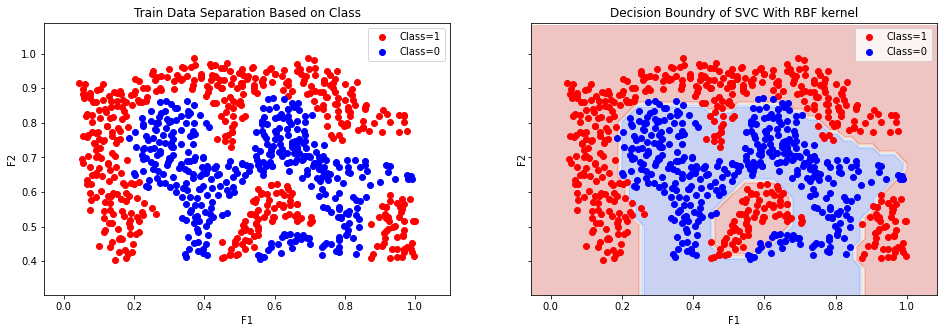

In [29]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = x_train['F1'].min() - 0.1, x_train['F1'].max() + 0.1
y_min, y_max = x_train['F2'].min() - 0.1, x_train['F2'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16, 5))

ax[0].scatter(x_train[y_train['Class'] == 1]['F1'], x_train[y_train['Class'] == 1]['F2'], 
              c='r', label="Class=1")
ax[0].scatter(x_train[y_train['Class'] == 0]['F1'], x_train[y_train['Class'] == 0]['F2'], 
              c='b', label="Class=0")
ax[0].set_xlabel("F1")
ax[0].set_ylabel("F2")
ax[0].set_xlim((x_min, x_max))
ax[0].set_ylim((y_min, y_max))
ax[0].set_title("Train Data Separation Based on Class")
ax[0].legend()

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax[1].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

ax[1].scatter(x_train[y_train['Class'] == 1]['F1'], x_train[y_train['Class'] == 1]['F2'], 
              c='r', label="Class=1")
ax[1].scatter(x_train[y_train['Class'] == 0]['F1'], x_train[y_train['Class'] == 0]['F2'], 
              c='b', label="Class=0")
ax[1].set_xlabel("F1")
ax[1].set_ylabel("F2")
ax[1].set_title("Decision Boundry of SVC With RBF kernel")
ax[1].legend()

plt.show()

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
ج) داده های آموزشی موجود در فایل Q3_3.csv را ابتدا به دو مجموعه اموزش و تست با نسبت 70 به 30 تقسیم کرده و سپس با استفاده از آموزش یک طبقه بند ماشین بردار پشتیبان و تغییر پارامتر های C و سیگما بر روی تمامی ترکیب های ذکر شده بهترین مرز تصمیم برای داده های تست را یافته و آن را به همراه داده های تست رسم نمایید.
</span>
</h4> 
    
</div>

In [30]:
Q3_3_Df = pandas.read_csv('Q3_3.csv', header=None, names=['F1','F2', 'Class'])

In [31]:
Q3_3_Df.head()

,F1,F2,Class
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1


In [32]:
y = Q3_3_Df[['Class']]
x = Q3_3_Df[['F1','F2']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)

In [33]:
a = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
pairs = list(itertools.combinations(a, 2))

acc_score = []
best_score = 0
for i in range(0, len(pairs)):
    model = svm.SVC(kernel='rbf', gamma=pairs[i][1], C=pairs[i][0])
    model.fit(x_train, y_train.values.ravel())
    y_predict = model.predict(x_test)
    acc_score.append(accuracy_score(y_test,y_predict))

best_score = max(acc_score)
best_index = acc_score.index(best_score)

In [34]:
print("Best Accuracy on Test Data={} for C={} and Gamma={}"
      .format(max(acc_score), pairs[best_index][0], pairs[best_index][1]))

Best Accuracy on Test Data=0.9375 for C=1 and Gamma=10


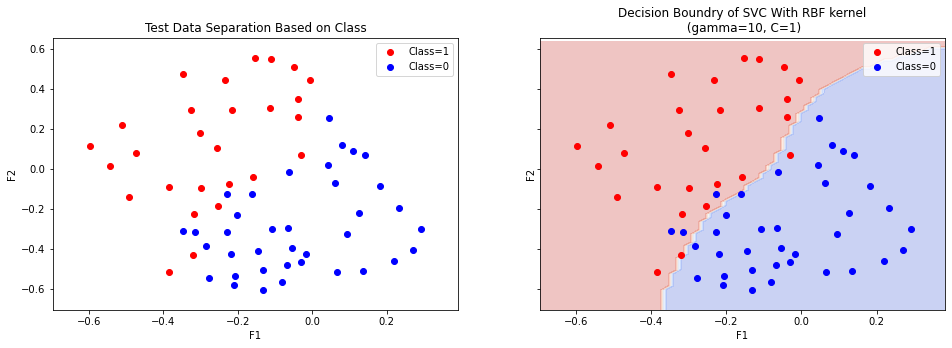

In [35]:

model = svm.SVC(kernel='rbf', gamma=pairs[best_index][1], C=pairs[best_index][0])
model.fit(x_train, y_train.values.ravel())

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = x_test['F1'].min() - 0.1, x_test['F1'].max() + 0.1
y_min, y_max = x_test['F2'].min() - 0.1, x_test['F2'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16, 5))

ax[0].scatter(x_test[y_test['Class'] == 1]['F1'], x_test[y_test['Class'] == 1]['F2'], 
              c='r', label="Class=1")
ax[0].scatter(x_test[y_test['Class'] == 0]['F1'], x_test[y_test['Class'] == 0]['F2'], 
              c='b', label="Class=0")
ax[0].set_xlabel("F1")
ax[0].set_ylabel("F2")
ax[0].set_xlim((x_min, x_max))
ax[0].set_ylim((y_min, y_max))
ax[0].set_title("Test Data Separation Based on Class")
ax[0].legend()

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax[1].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

ax[1].scatter(x_test[y_test['Class'] == 1]['F1'], x_test[y_test['Class'] == 1]['F2'], 
              c='r', label="Class=1")
ax[1].scatter(x_test[y_test['Class'] == 0]['F1'], x_test[y_test['Class'] == 0]['F2'], 
              c='b', label="Class=0")
ax[1].set_xlabel("F1")
ax[1].set_ylabel("F2")
ax[1].set_title("Decision Boundry of SVC With RBF kernel\n (gamma={}, C={})".format(pairs[best_index][1], pairs[best_index][0]))
ax[1].legend()

plt.show()

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
داده های آموزشی موجود در فایل Q4.csv دیتاست مشهور Iris است که ویژگی های اندازه گیری شده از سه نوع مختلف گل زنبق را نشان می دهد.
</span>
</h4> 
<h4>
<span style='font-family:"B Nazanin"'>    
الف) ابتدا 70 درصد داده ها را به منظور آموزش طبقه بند و 30 درصد باقی مانده را برای تست به صورت تصادفی تقسیم نمایید.
</span>
</h4>
    
</div>

In [36]:
Q4_Df = pandas.read_csv('Q4.csv')

In [37]:
Q4_Df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [38]:
y = Q4_Df[['variety']]
x = Q4_Df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
ب) یک طبقه بند K نزدیک ترین همسایگی به منظور تشخیص نوع گل زنبق آموزش دهید.
</span>
</h4> 
    
</div>

In [39]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [40]:
y_predict = model.predict(x_train)
print("Accuracy on Train Data =", accuracy_score(y_train,y_predict))

Accuracy on Train Data = 0.9714285714285714


In [41]:
y_predict = model.predict(x_test)
print("Accuracy on Test Data =", accuracy_score(y_test,y_predict))

Accuracy on Test Data = 0.9555555555555556


<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
ج) میزان دقت بر روی داده های تست به ازای مقادیر مختلف k محاسبه کرده و بر روی یک نمودار نمایش دهید. با این کار مقدار بهینه k بر روی داده های تست محاسبه می شود.
</span>
</h4> 
    
</div>

In [42]:
acc_score = []
for K in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=K)
    model.fit(x_train, y_train.values.ravel())
    y_predict = model.predict(x_test)
    acc_score.append(accuracy_score(y_test,y_predict))

In [43]:
print("Best Accuracy on Test Data={} for K={}".format(max(acc_score), acc_score.index(max(acc_score))))

Best Accuracy on Test Data=1.0 for K=6


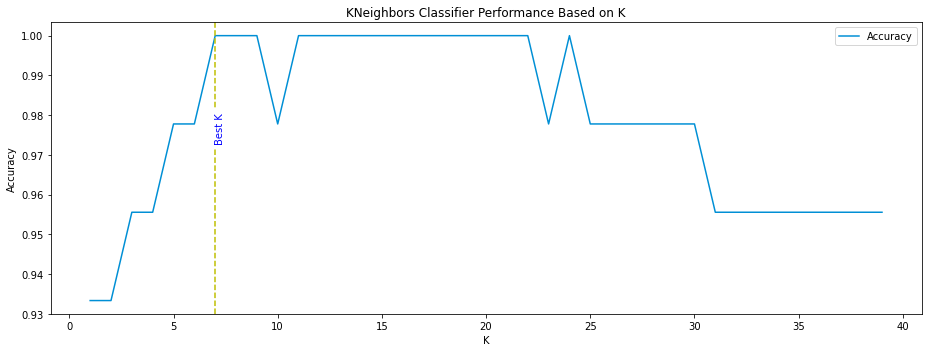

In [44]:
plt.figure(figsize=(13, 5))
plt.plot(range(1, 40), acc_score, c="#008fd5", label="Accuracy")

best_index = acc_score.index(max(acc_score)) + 1
min_ylim, max_ylim = plt.ylim() 
plt.axvline(best_index, color='y', linestyle='dashed')
plt.text(best_index, max_ylim*0.97, "Best K", color='b', rotation=90, backgroundcolor='1')

plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.title("KNeighbors Classifier Performance Based on K")
plt.tight_layout()
plt.show()